In [195]:
import pandas as pd 
import sqlalchemy as sql
import alpaca_trade_api as tradeapi 
import os
from dotenv import load_dotenv
#import hvplot.pandas 
from pandas_datareader import data  #remember to pip install pandas-datareader
import pandas_datareader as pdr 
import math 
import numpy as np

%matplotlib inline 

In [196]:
symbol='USO','TSLA', 'SPY'
start='2010-06-29'
end='2021-10-15'

df=data.get_data_yahoo(symbol, start, end)['Close']
df.head()

Symbols,USO,TSLA,SPY
Date,,,
2010-06-29,273.359985,4.778,104.209999
2010-06-30,271.679993,4.766,103.220001
2010-07-01,262.959991,4.392,102.760002
2010-07-02,260.799988,3.840,102.199997
2010-07-06,260.880005,3.222,102.870003


In [197]:
df.tail()

Symbols,USO,TSLA,SPY
Date,,,
2021-10-11,56.180000,791.940002,434.690002
2021-10-12,56.110001,805.719971,433.619995
2021-10-13,56.160000,811.080017,435.179993
2021-10-14,56.810001,818.320007,442.500000
2021-10-15,57.150002,843.030029,445.869995


In [98]:
df['USO_pct_change']= df['USO'].pct_change()
df['TSLA_pct_change']= df['TSLA'].pct_change()
df['SPY_pct_change']= df['SPY'].pct_change()


df.describe()


Symbols,USO,TSLA,SPY,USO_pct_change,TSLA_pct_change,SPY_pct_change
count,2846.000000,2846.000000,2846.000000,2845.000000,2845.000000,2845.000000
mean,164.771809,106.112510,226.313131,-0.000287,0.002437,0.000568
std,102.387174,189.260934,82.173761,0.022700,0.035274,0.010644
min,17.040001,3.160000,102.199997,-0.253150,-0.210628,-0.109424
25%,85.120003,10.464000,158.595005,-0.010686,-0.014816,-0.003469
50%,112.760002,45.909000,209.770004,0.000690,0.001255,0.000649
75%,276.460007,65.295502,279.069992,0.011073,0.019081,0.005452
max,361.200012,883.090027,453.190002,0.166667,0.243951,0.090603


In [99]:
# Working with SQL in order to not ping the Alpaca API too much  
#Creating SQL connection/engine

database_connection_string = 'sqlite:///'
engine = sql.create_engine(database_connection_string)
engine

Engine(sqlite:///)

In [100]:
#shoving closing_prices_df from Alpaca into a SQL Table 

df.to_sql('closing_prices', engine, index= True, if_exists='replace' )


In [101]:
#Code to grab the data from the SQL table into a pandas df to analyze further 

closing_prices_df = pd.read_sql_table ('closing_prices', con=engine)


In [102]:
closing_prices_df.describe()

,USO,TSLA,SPY,USO_pct_change,TSLA_pct_change,SPY_pct_change
count,2846.000000,2846.000000,2846.000000,2845.000000,2845.000000,2845.000000
mean,164.771809,106.112510,226.313131,-0.000287,0.002437,0.000568
std,102.387174,189.260934,82.173761,0.022700,0.035274,0.010644
min,17.040001,3.160000,102.199997,-0.253150,-0.210628,-0.109424
25%,85.120003,10.464000,158.595005,-0.010686,-0.014816,-0.003469
50%,112.760002,45.909000,209.770004,0.000690,0.001255,0.000649
75%,276.460007,65.295502,279.069992,0.011073,0.019081,0.005452
max,361.200012,883.090027,453.190002,0.166667,0.243951,0.090603


In [103]:
closing_prices_df.head()

,Date,USO,TSLA,SPY,USO_pct_change,TSLA_pct_change,SPY_pct_change
0,2010-06-29,273.359985,4.778,104.209999,NaN,NaN,NaN
1,2010-06-30,271.679993,4.766,103.220001,-0.006146,-0.002512,-0.009500
2,2010-07-01,262.959991,4.392,102.760002,-0.032097,-0.078472,-0.004456
3,2010-07-02,260.799988,3.840,102.199997,-0.008214,-0.125683,-0.005450
4,2010-07-06,260.880005,3.222,102.870003,0.000307,-0.160938,0.006556


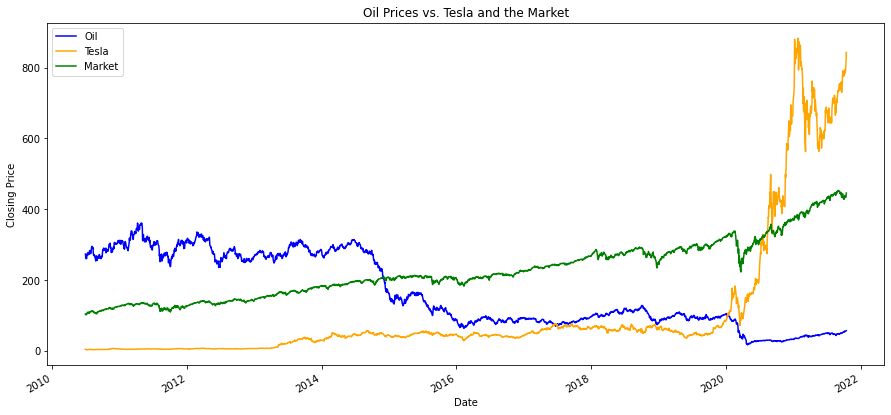

In [104]:
#This is an overlay plot of the closing prices of the three tickers for the whole dataset
closing_prices_df = closing_prices_df.set_index("Date")

closing_prices_df['USO'].plot(legend=True, figsize=(15, 7), title="Oil Prices vs. Tesla and the Market", color="blue", label="Oil", xlabel="Date", ylabel ="Closing Price")
closing_prices_df['TSLA'].plot(legend=True, figsize=(15, 7), color="orange", label="Tesla")
closing_prices_df['SPY'].plot(legend=True, figsize=(15, 7), color="green", label="Market");

**Overlay Plot**

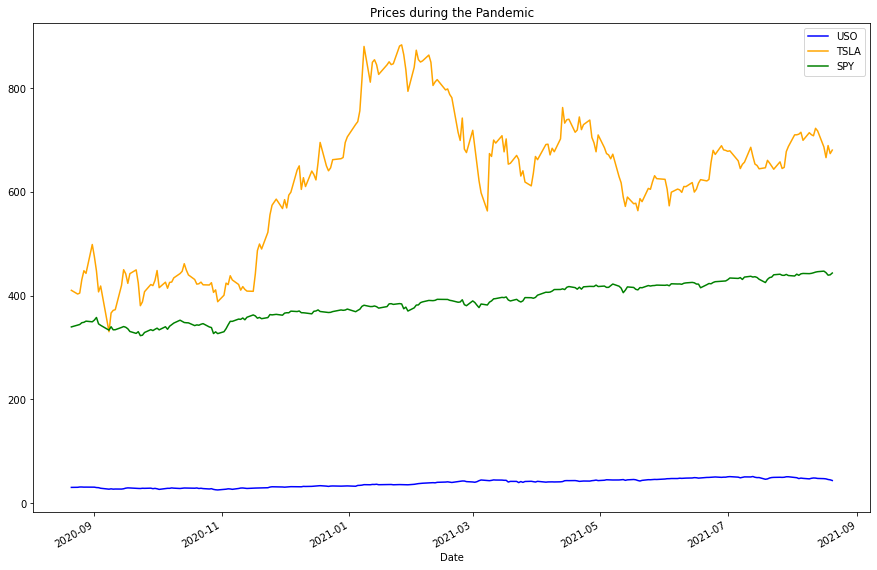

In [171]:
#This will show an overlay plot for the three different tickers on the time period chosen
#This is an interesting time frame as it showed a rapid growth in TSLA.
closing_prices_df['USO'].loc['2020-08-21' : '2021-08-21'].plot(
    legend=True, figsize=(15, 10), title= "Prices during the Pandemic", color="blue", label="USO")
closing_prices_df['TSLA'].loc['2020-08-21' : '2021-08-21'].plot(
    legend=True, figsize=(15, 10), color= "orange", label="TSLA")
closing_prices_df['SPY'].loc['2020-08-21' : '2021-08-21'].plot(
    legend=True, figsize=(15, 10), color="green", label="SPY");

In [115]:
#The avg_profit_sum_per_day, $525.86 is a rough estimate of the potential to make per day in 
#Q1 of 2021. 

**Daily & Cumulative Returns**

In [ ]:
Daily & Cumulative Returns

In [183]:
# Calculate the daily return for TSLA using the 'pct_change()' function
daily_returns_TSLA = closing_prices_df["TSLA"].pct_change()

# Review the daily_returns TSLA DataFrame using pctchange function
daily_returns_TSLA.describe()

count    2845.000000
mean        0.002437
std         0.035274
min        -0.210628
25%        -0.014816
50%         0.001255
75%         0.019081
max         0.243951
Name: TSLA, dtype: float64

In [184]:
# Calculating daily return for a 1 year period
daily_returns_1_year_TSLA = daily_returns_TSLA.loc["2020-08-21":"2021-08-21"]

# Display 1 year return statistics
daily_returns_1_year_TSLA.describe()

count    252.000000
mean       0.002946
std        0.041026
min       -0.210628
25%       -0.020288
50%        0.001733
75%        0.024151
max        0.196412
Name: TSLA, dtype: float64

In [185]:
# Calculating daily return for a 5 year period
daily_returns_5_year_TSLA = daily_returns_TSLA.loc["2016-08-21":"2021-08-21"]

# Display 5 year return statistics
daily_returns_5_year_TSLA.describe()

count    1259.000000
mean        0.002852
std         0.037336
min        -0.210628
25%        -0.015237
50%         0.001267
75%         0.019401
max         0.198949
Name: TSLA, dtype: float64

In [186]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_TSLA = (1 + daily_returns_TSLA).cumprod()
cumulative_returns_TSLA.head()

Date
2010-06-29         NaN
2010-06-30    0.997488
2010-07-01    0.919213
2010-07-02    0.803684
2010-07-06    0.674341
Name: TSLA, dtype: float64

In [120]:
cumulative_returns_5_year_TSLA = (1 + daily_returns_5_year_TSLA).cumprod()
cumulative_returns_5_year_TSLA.head()

Date
2016-08-22    0.990800
2016-08-23    0.999289
2016-08-24    0.989422
2016-08-25    0.982044
2016-08-26    0.977733
Name: TSLA, dtype: float64

In [187]:
cumulative_returns_1_year_TSLA = (1 + daily_returns_1_year_TSLA).cumprod()
cumulative_returns_1_year_TSLA.head()

Date
2020-08-21    1.024053
2020-08-24    1.006179
2020-08-25    1.010745
2020-08-26    1.075601
2020-08-27    1.118352
Name: TSLA, dtype: float64

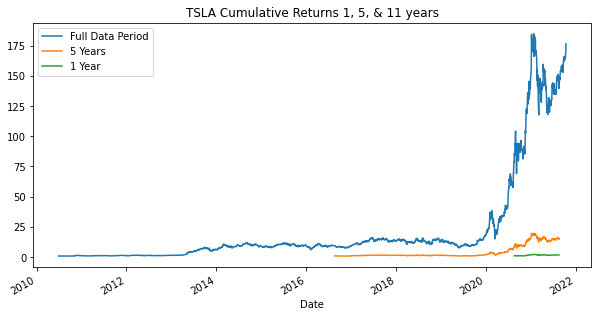

In [188]:
#Graph cumulative returns for TSLA across full data period, 5 years and 1 year
ax = cumulative_returns_TSLA.plot(
    legend="True",
    figsize=(10,5),
    title="TSLA Cumulative Returns 1, 5, & 11 years")
cumulative_returns_5_year_TSLA.plot(ax=ax)
cumulative_returns_1_year_TSLA.plot(ax=ax)

ax.legend(["Full Data Period", "5 Years", "1 Year"]);

In [189]:
# Calculate the daily return for USO using the 'pct_change()' function
daily_returns_USO = closing_prices_df["USO"].pct_change()

# Review the daily_returns USO DataFrame using pctchange function
daily_returns_USO.head()

Date
2010-06-29         NaN
2010-06-30   -0.006146
2010-07-01   -0.032097
2010-07-02   -0.008214
2010-07-06    0.000307
Name: USO, dtype: float64

In [46]:
# Calculating daily return for a 1 year period
daily_returns_1_year_USO = daily_returns_USO.loc["2020-08-21":"2021-08-21"]

# Display 1 year return statistics
daily_returns_1_year_USO.describe()

count    252.000000
mean       0.001613
std        0.020589
min       -0.076449
25%       -0.009731
50%        0.002923
75%        0.014597
max        0.060446
Name: USO, dtype: float64

In [47]:
# Calculating daily return for a 5 year period
daily_returns_5_year_USO = daily_returns_USO.loc["2016-08-21":"2021-08-21"]

# Display 5 year return statistics
daily_returns_5_year_USO.describe()

count    1259.000000
mean       -0.000234
std         0.026032
min        -0.253150
25%        -0.010710
50%         0.001391
75%         0.012021
max         0.166667
Name: USO, dtype: float64

In [48]:
cumulative_returns_USO = (1 + daily_returns_USO).cumprod()
cumulative_returns_USO.head()

Date
2010-06-29         NaN
2010-06-30    0.993854
2010-07-01    0.961955
2010-07-02    0.954053
2010-07-06    0.954346
Name: USO, dtype: float64

In [49]:
cumulative_returns_5_year_USO = (1 + daily_returns_5_year_USO).cumprod()
cumulative_returns_5_year_USO.head()

Date
2016-08-22    0.967372
2016-08-23    0.977954
2016-08-24    0.954145
2016-08-25    0.965608
2016-08-26    0.965608
Name: USO, dtype: float64

In [50]:
cumulative_returns_1_year_USO = (1 + daily_returns_1_year_USO).cumprod()
cumulative_returns_1_year_USO.head()

Date
2020-08-21    0.988860
2020-08-24    0.994430
2020-08-25    1.013106
2020-08-26    1.013434
2020-08-27    1.004915
Name: USO, dtype: float64

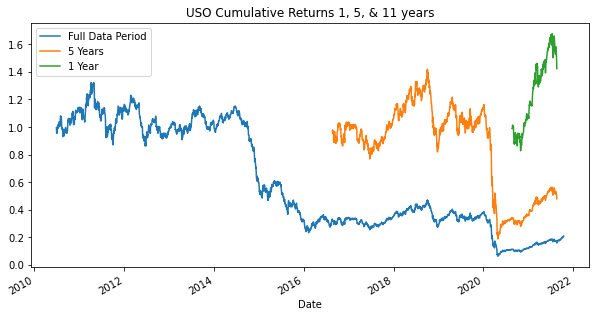

In [51]:
#Graph cumulative returns for USO across full data period, 5 years and 1 year
ax = cumulative_returns_USO.plot(
    legend="True",
    figsize=(10,5),
    title="USO Cumulative Returns 1, 5, & 11 years")
cumulative_returns_5_year_USO.plot(ax=ax)
cumulative_returns_1_year_USO.plot(ax=ax)

ax.legend(["Full Data Period", "5 Years", "1 Year"]);

**Calculating Standard Deviation and Daily Returns for Volatility**

In [121]:
closing_prices_df.head()

,USO,TSLA,SPY,USO_pct_change,TSLA_pct_change,SPY_pct_change
Date,,,,,,
2010-06-29,273.359985,4.778,104.209999,NaN,NaN,NaN
2010-06-30,271.679993,4.766,103.220001,-0.006146,-0.002512,-0.009500
2010-07-01,262.959991,4.392,102.760002,-0.032097,-0.078472,-0.004456
2010-07-02,260.799988,3.840,102.199997,-0.008214,-0.125683,-0.005450
2010-07-06,260.880005,3.222,102.870003,0.000307,-0.160938,0.006556


In [194]:
daily_returns_df=closing_prices_df.drop(columns = ["USO","TSLA","SPY"], axis=1)
daily_returns_df.head()
#daily_returns_df.plot(figsize=(20,10),title ="Percent Change over time")

,USO_pct_change,TSLA_pct_change,SPY_pct_change
Date,,,
2010-06-29,NaN,NaN,NaN
2010-06-30,-0.006146,-0.002512,-0.009500
2010-07-01,-0.032097,-0.078472,-0.004456
2010-07-02,-0.008214,-0.125683,-0.005450
2010-07-06,0.000307,-0.160938,0.006556


In [127]:
# Calculate the standard deviation for each of the tech stocks
# call the Pandas `std` function on the `daily_returns` DataFrame
standard_deviation = daily_returns_df.std()

# Display results
standard_deviation.head()

USO_pct_change     0.022700
TSLA_pct_change    0.035274
SPY_pct_change     0.010644
dtype: float64

In [128]:
# Sort the standard deviation values using Pandas 'sort_values' function
standard_deviation_sorted = standard_deviation.sort_values()

# Display results
standard_deviation_sorted

#Here we can see TSLA has the largest standard deviation which means it's the most risky 
#stock whereas SPY has the lowest standard deviation indicating the least risky stock

SPY_pct_change     0.010644
USO_pct_change     0.022700
TSLA_pct_change    0.035274
dtype: float64

In [131]:
# Calculate the annualized standard deviation, using the standard_deviation
# from the daily_returns DataFrame multiplied by the square root (np.sqrt)
# of the number of trading days in a year (252)
annualized_standard_deviation = standard_deviation * np.sqrt(252)

# Display the sorted results
annualized_standard_deviation.sort_values()

SPY_pct_change     0.168969
USO_pct_change     0.360346
TSLA_pct_change    0.559959
dtype: float64

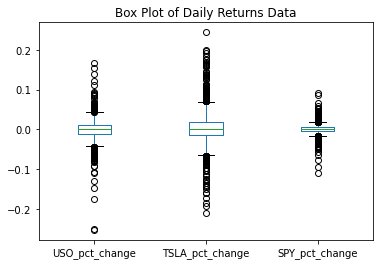

In [135]:
# Plot box plot
#This confirms that TSLA is the most volatile as it has the longest whiskers and had some outlier
#which is the same confirmation from analyzing standard deviation. 
daily_returns_df.plot.box(title ="Box Plot of Daily Returns Data");

*Calculating Sharpe Ratio*

In [136]:
# Set the number of trading days for the year
year_trading_days = 252

# To calculate the annualized average return of portfolio,
# calculate the mean of the daily return values for each stock in 'portfolio'
# and then multiply that by the number of trading days in the year
average_annual_return_portfolio= daily_returns_df.mean() * year_trading_days

# Display the average annual return values for each stock in 'portfolio'
average_annual_return_portfolio

USO_pct_change    -0.072343
TSLA_pct_change    0.614237
SPY_pct_change     0.143129
dtype: float64

In [137]:
# Calculate the annualized standard deviation, using the standard_deviation
# from the daily_returns DataFrame multiplied by the square root (np.sqrt)
# of the number of trading days in a year (252)
annualized_standard_deviation = standard_deviation * np.sqrt(252)

# Display the sorted results
annualized_standard_deviation.sort_values()

SPY_pct_change     0.168969
USO_pct_change     0.360346
TSLA_pct_change    0.559959
dtype: float64

In [139]:
# Calculate Sharpe Ratio by dividing the average annual return by the standard deviation
sharpe_ratios = average_annual_return_portfolio / annualized_standard_deviation
# Display sorted results
sharpe_ratios.sort_values()

USO_pct_change    -0.200759
SPY_pct_change     0.847074
TSLA_pct_change    1.096933
dtype: float64

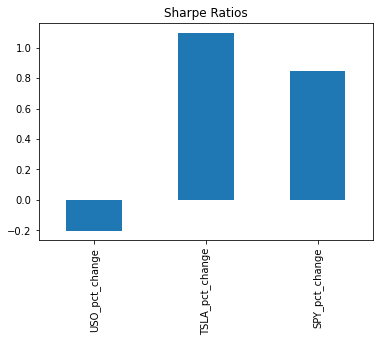

In [190]:
sharpe_ratios.plot.bar(title="Sharpe Ratios");

**Calculating Betas**

In [142]:
#Calculating TSLA Beta
daily_returns_TSLA_SPY=daily_returns_df.drop(columns = ["USO_pct_change"], axis=1)
daily_returns_TSLA_SPY.head()

,TSLA_pct_change,SPY_pct_change
Date,,
2010-06-29,NaN,NaN
2010-06-30,-0.002512,-0.009500
2010-07-01,-0.078472,-0.004456
2010-07-02,-0.125683,-0.005450
2010-07-06,-0.160938,0.006556


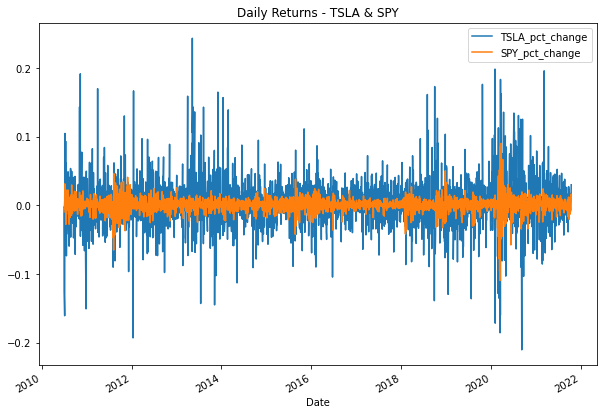

In [145]:
# Plotting the daily returns for TSLA and the SPY
daily_returns_TSLA_SPY.plot(figsize=(10, 7), title="Daily Returns - TSLA & SPY");

In [146]:
# Using the Pandas 'var' function, calculate the variance of TSLA and SPY
daily_returns_TSLA_SPY.var()

TSLA_pct_change    0.001244
SPY_pct_change     0.000113
dtype: float64

In [148]:
# Calculate covariance of all daily returns of TSLA vs. SPY
covariance_TSLA = daily_returns_TSLA_SPY['TSLA_pct_change'].cov(daily_returns_TSLA_SPY['SPY_pct_change'])

# Display the covariance
print(f"{covariance_TSLA: .8f} ")

 0.00014763 


In [191]:
# Calculate beta of all daily returns of TSLA
# Divide the covariance of TSLA versus SPY by the variance of SPY
TSLA_beta = daily_returns_TSLA_SPY['TSLA_pct_change'].cov(daily_returns_TSLA_SPY['SPY_pct_change']) / daily_returns_TSLA_SPY["SPY_pct_change"].var()

# Display the TSLA$ beta
TSLA_beta

1.3030067874364868

In [152]:
#Calculating USO Beta
daily_returns_USO_SPY=daily_returns_df.drop(columns = ["TSLA_pct_change"], axis=1)
daily_returns_USO_SPY.head()

,USO_pct_change,SPY_pct_change
Date,,
2010-06-29,NaN,NaN
2010-06-30,-0.006146,-0.009500
2010-07-01,-0.032097,-0.004456
2010-07-02,-0.008214,-0.005450
2010-07-06,0.000307,0.006556


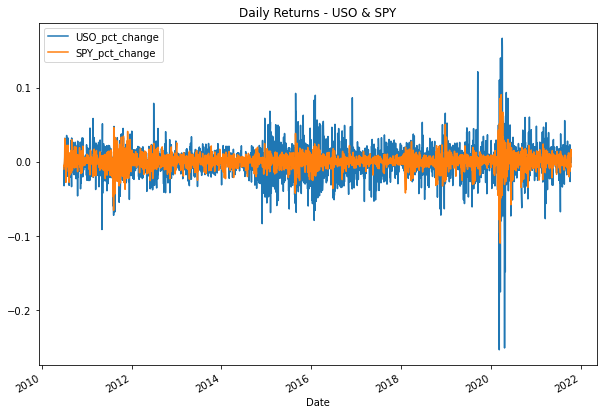

In [153]:
# Plotting the daily returns for USO and the SPY
daily_returns_USO_SPY.plot(figsize=(10, 7), title="Daily Returns - USO & SPY");

In [154]:
# Using the Pandas 'var' function, calculate the variance of USO and SPY
daily_returns_USO_SPY.var()

USO_pct_change    0.000515
SPY_pct_change    0.000113
dtype: float64

In [155]:
# Calculate covariance of all daily returns of USO vs. SPY
covariance_USO = daily_returns_USO_SPY['USO_pct_change'].cov(daily_returns_USO_SPY['SPY_pct_change'])

# Display the covariance
print(f"{covariance_USO: .8f} ")

 0.00009619 


In [156]:
# Calculate beta of all daily returns of USO
# Divide the covariance of USO versus SPY by the variance of SPY
USO_beta = daily_returns_USO_SPY['USO_pct_change'].cov(daily_returns_USO_SPY['SPY_pct_change']) / daily_returns_USO_SPY["SPY_pct_change"].var()

# Display the USO beta
USO_beta

0.8490111831604799